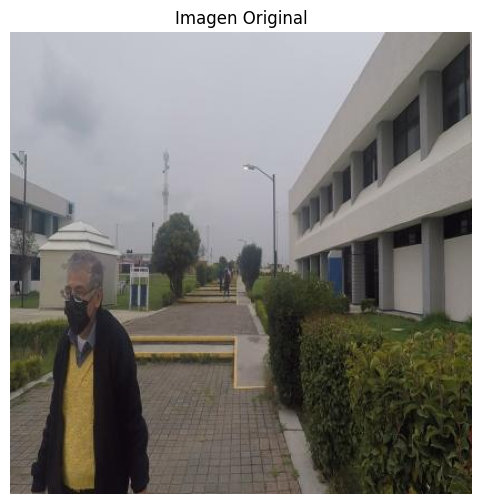

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import algoritmos.sift as sf  

##############################################
# Paso 1: Cargar y mostrar la imagen original
##############################################

ruta_imagen = '../src/images/test/GOPR0141_MP4-195_jpg.rf.5ed66cd884da63e15b570f0db8d88740.jpg'
img = cv2.imread(ruta_imagen)

# Mostrar la imagen original (convertida de BGR a RGB para visualización)
plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")
plt.show()

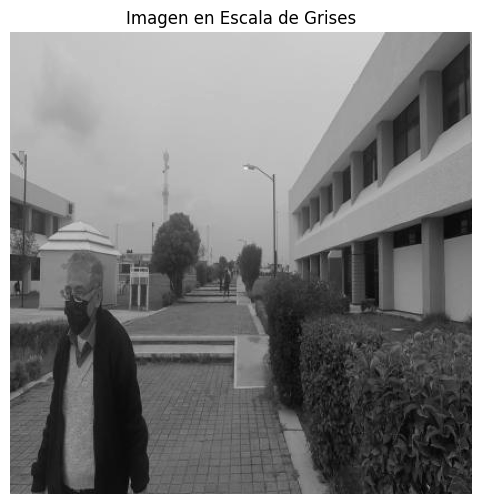

In [27]:
#####################################################
# Paso 2: Convertir la imagen a escala de grises
#####################################################
# Aunque SIFT internamente convierte la imagen a escala de grises, 
# lo hacemos de forma explícita para visualizar el proceso.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,6))
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.axis("off")
plt.show()

In [28]:
#####################################################
# Paso 3: Configuración del detector SIFT
#####################################################
# Definimos los parámetros para SIFT:
nfeatures = 0            # 0 = detectar todas las características posibles
nOctaveLayers = 3        # Número de capas por octava
contrastThreshold = 0.04 # Umbral para descartar características de bajo contraste
edgeThreshold = 10       # Umbral para descartar características en bordes
sigma = 1.6              # Desviación estándar inicial para el filtro Gaussiano

# Crear el objeto SIFT usando la clase definida en algoritmos/sift.py
algo_sift = sf.sift_detect(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma)


In [29]:
#####################################################
# Paso 4: Detectar keypoints y calcular descriptores
#####################################################
# La función detect_and_compute convierte la imagen a escala de grises internamente si es necesario.
keypoints, descriptors = algo_sift.detect_and_compute(img)
print("Número de keypoints detectados:", len(keypoints))


Número de keypoints detectados: 625


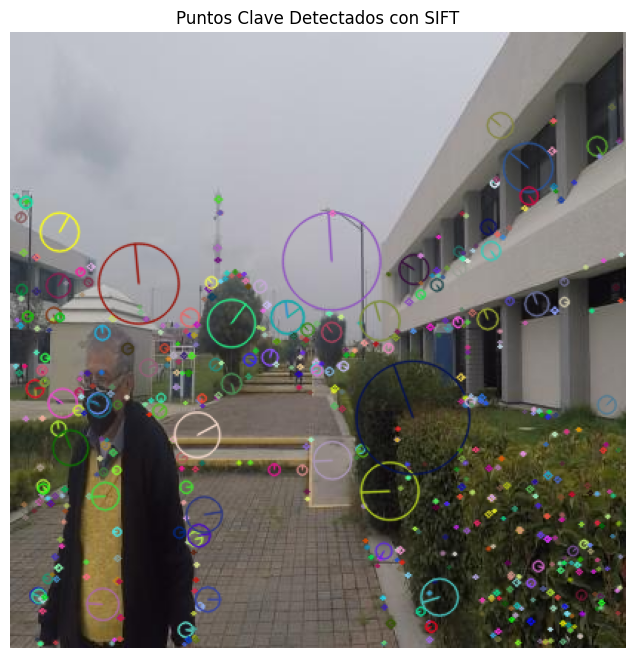

In [30]:
#####################################################
# Paso 5: Dibujar y mostrar los keypoints detectados
#####################################################
# Dibujar los puntos clave sobre la imagen original
img_keypoints = algo_sift.draw_keypoints(img, keypoints)

# Mostrar la imagen con los keypoints detectados
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Puntos Clave Detectados con SIFT")
plt.axis("off")
plt.show()

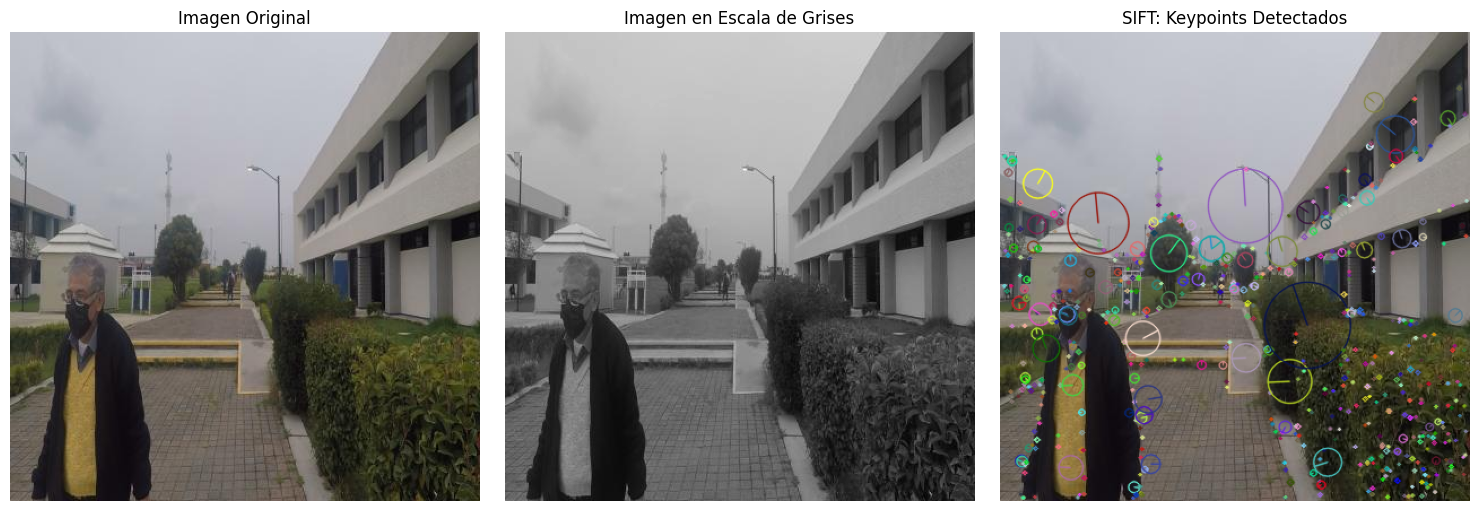

In [31]:
#####################################################
# Paso 6: Visualización comparativa de todo el proceso
#####################################################
plt.figure(figsize=(15,5))

# Imagen original
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")
plt.axis("off")

# Imagen en escala de grises
plt.subplot(1,3,2)
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.axis("off")

# Imagen con keypoints SIFT
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
plt.title("SIFT: Keypoints Detectados")
plt.axis("off")

plt.tight_layout()
plt.show()